# Лабораторная работа №5

In [310]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt

## Загрузка и обработка датафреймов

In [311]:
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

In [312]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [313]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Проводится пустых значений датафреймов. Пустых значений в датафрейме не найдено.

In [314]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [315]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Удаление дубликатов. В датафрейме нет дубликатов.

In [316]:
orders.duplicated().sum()

0

In [317]:
visitors.duplicated().sum()

0

In [318]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])
orders = orders.rename(str.lower, axis='columns')

## Задание

Проверка на повторяющихся пользователей

In [319]:
ordersGroupA = orders[orders['group'] == 'A']
ordersGroupB = orders[orders['group'] == 'B']

In [320]:
ct = 0
for iA, rA in ordersGroupA.iterrows():
    for iB, rB in ordersGroupB.iterrows():
        if rA['visitorid'] == rB['visitorid']:
            orders = orders.drop(orders[orders.visitorid == rowOrderA['visitorid']].index)
            ct += 1
            
print(ct)

183


In [321]:
datesGroups = orders[['date','group']].drop_duplicates()

Получение агрегированных кумулятивных данных по дням о заказах

In [322]:
ordersAggregated = datesGroups.apply(
    lambda x: 
        orders[np.logical_and(
            orders['date'] <= x['date'], 
            orders['group'] == x['group'])
        ].
        agg({'date' : 'max', 
             'group' : 'max', 
             'transactionid' : 'nunique', 
             'visitorid' : 'nunique', 
             'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated.head()

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Получение агрегированных кумулятивных данных по дням о посетителях

In [323]:
visitorsAggregated = datesGroups.apply(lambda x: 
    visitors[np.logical_and(
        visitors['date'] <= x['date'], 
        visitors['group'] == x['group'])
    ].
    agg({'date' : 'max', 
         'group' : 'max', 
         'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [325]:
cumulativeData = ordersAggregated
cumulativeData = cumulativeData.join(visitorsAggregated.drop(['date', 'group'], axis=1), sort=False)
cumulativeData.head()

,date,group,transactionid,visitorid,revenue,visitors
55,2019-08-01,A,24,20,148579,719
66,2019-08-01,B,21,20,101217,713
175,2019-08-02,A,44,38,242401,1338
173,2019-08-02,B,45,43,266748,1294
291,2019-08-03,A,68,62,354874,1845


Переименование столбцов для соответствия методическим указаниям

In [326]:
cumulativeData.rename(columns={'transactionid': 'orders', 'visitorid': 'byers'}, inplace=True)
cumulativeData

,date,group,orders,byers,revenue,visitors
55,2019-08-01,A,24,20,148579,719
66,2019-08-01,B,21,20,101217,713
175,2019-08-02,A,44,38,242401,1338
173,2019-08-02,B,45,43,266748,1294
291,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
496,2019-08-29,B,595,543,5549718,17708
730,2019-08-30,A,542,492,4020590,18037
690,2019-08-30,B,619,566,5764951,18198
958,2019-08-31,A,554,502,4082423,18736


### Индивидуальное задание

Вариант 21(3)

Изобразить график конверсии по группам А и B. По оси x – date, по оси y – конверсия.

In [327]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B']

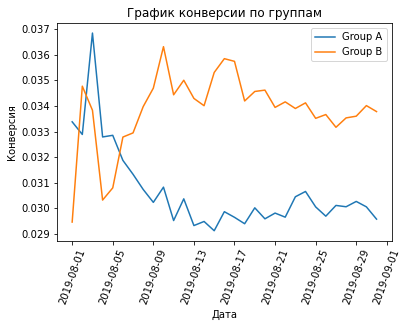

In [352]:
fig, ax = plt.subplots()

ax.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label = 'Group A')
ax.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label = 'Group B')

plt.title('График конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.tick_params(axis='x', rotation=70)
plt.legend()
plt.show()

### Вывод

Исходя из этого графика можно сделать вывод, о том, что число заказов к посещениям группы А росло с 5 августа по 10 августа, после чего практически не изменялось. При этом конверсия группы В стремительно падала в первой половине месяца, после чего держалась на значительно низком уровне.
Также наблюдается скачок конверсии у обеих групп в районе 3 августа.